<a href="https://colab.research.google.com/github/yunhui666/Kaggle_House_Prediction_MLProject/blob/main/Step6__ModelingIII_Cross_Validation%2C_Tuning_%26_Grid_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import libraries


In [ ]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline 
import seaborn as sns

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

### Read in dataset

In [ ]:
# Load real estate data from CSV
DF = pd.read_csv('data/clean_inputwithfeatures.csv')

In [ ]:
df = DF[DF.SalePrice.isnull() == False]

In [ ]:
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,Id,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YrSold,big_house,built_during_recession,sold_during_recession,property_age,property_remodel_age,Alley_Grvl,Alley_Missing,Alley_Pave,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_TownHouse,BsmtCond_Fa,BsmtCond_Gd,...,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_Missing,RoofMatl_CompShg,RoofMatl_Other,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_Missing,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_Missing,Utilities_NoSeWa
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,0,2,548.0,2.0,2003.0,1710,1,1,1,8450,65.0,0,60,196.0,0,2,61,5,7,0,208500.0,0,8,856.0,0,2008,0,0,0,5,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,1,2,460.0,2.0,1976.0,1262,0,2,1,9600,80.0,0,20,0.0,0,5,0,8,6,0,181500.0,0,6,1262.0,298,2007,0,0,0,31,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,1,2,608.0,2.0,2001.0,1786,1,3,1,11250,68.0,0,60,162.0,0,9,42,5,7,0,223500.0,0,6,920.0,0,2008,0,0,0,7,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,1,1,642.0,3.0,1998.0,1717,0,4,1,9550,60.0,0,70,0.0,0,2,35,5,7,0,140000.0,0,7,756.0,0,2006,0,0,0,91,55,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,1,2,836.0,3.0,2000.0,2198,1,5,1,14260,84.0,0,60,350.0,0,12,84,5,8,0,250000.0,0,9,1145.0,192,2008,0,0,0,8,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0


### Multiple Linear Regression

* Set it as a benchmark and see the performance.

In [ ]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='SalePrice ~ GrLivArea + LotArea + TotRmsAbvGrd + property_age + YrSold + OverallQual + GarageCars + property_remodel_age', data=df).fit()

# print the coefficients
lm.params

Intercept              -987316.257200
GrLivArea                   44.992072
LotArea                      0.876513
TotRmsAbvGrd              -190.744135
property_age              -574.243867
YrSold                     471.487436
OverallQual              21996.719577
GarageCars               15499.499465
property_remodel_age       287.025080
dtype: float64

In [ ]:
# print a summary of the fitted model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     617.8
Date:                Sat, 19 Dec 2020   Prob (F-statistic):               0.00
Time:                        21:19:02   Log-Likelihood:                -17301.
No. Observations:                1455   AIC:                         3.462e+04
Df Residuals:                    1446   BIC:                         3.467e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -9.873e+05   1.41e+06     -0.701      0.483   -3.75e+06    1.77e+06
GrLivArea               44.9921      3.785     11.887      0.000      37.567      52.417
LotArea                  0.8765      0.097      9.015      0.000       0.686       1.067
TotRmsAbvGrd          -190.7441   1045.464     -0.182      0.855   -2241.532    1860.044
property_age          -574.2439     58.940     -9.743      0.000    -689.861    -458.627
YrSold                 471.4874    701.342      0.672      0.502    -904.269    1847.244
OverallQual             2.2e+04   1083.261     20.306      0.000    1.99e+04    2.41e+04
GarageCars             1.55e+04   1687.574      9.184      0.000    1.22e+04    1.88e+04
property_remodel_age   287.0251     59.141      4.853      0.000     171.013     403.037
==============================================================================
Omnibus:                      310.849   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10887.553
Skew:                          -0.069   Prob(JB):                         0.00
Kurtosis:                      16.400   Cond. No.                     2.21e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Split-out validation dataset to Training and Testing

In [ ]:
# Function for splitting training and test set
from sklearn.model_selection import train_test_split

In [ ]:
# Create separate object for target variable
y = df.SalePrice

# Create separate object for input features
X = df.drop(['SalePrice','Id'], axis=1)

In [ ]:
type(y)

pandas.core.series.Series

### Train/ Test Split
* You need to split your dataset into a training set and a testing set. You will train your model on the training set and test the model performance on the testing set.
* Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.1, 
                                                    random_state=1)

In [ ]:
print( len(X_train), len(X_test), len(y_train), len(y_test) )

1309 146 1309 146


In [ ]:
# Summary statistics of X_train
X_train.describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YrSold,big_house,built_during_recession,sold_during_recession,property_age,property_remodel_age,Alley_Grvl,Alley_Missing,Alley_Pave,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_TownHouse,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Missing,BsmtCond_Po,...,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_Missing,RoofMatl_CompShg,RoofMatl_Other,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_Missing,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_Missing,Utilities_NoSeWa
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,...,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.0,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.0,1309.000000
mean,1167.058824,342.219251,3.576012,2.867074,446.285714,47.882353,0.433155,0.058060,564.106188,21.715814,0.615737,1.570665,475.381207,1.774637,1978.583345,1514.716578,0.378915,1.047364,10558.216196,69.794161,5.438503,57.272727,101.925446,48.505730,6.310924,47.766234,5.593583,6.106188,2.653170,14.436975,6.519481,1058.274255,93.010695,2007.805195,0.009167,0.013751,0.347594,36.287242,13.524828,0.033613,0.939649,0.026738,0.831169,0.022154,0.037433,0.109244,0.029030,0.044309,0.026738,0.001528,...,0.034377,0.158136,0.006112,0.052712,0.026738,0.052712,0.079450,0.016043,0.048892,0.038961,0.061115,0.019099,0.024446,0.007639,0.056532,0.019099,0.924370,0.000764,0.001528,0.002292,0.995416,0.984721,0.015279,0.009167,0.786860,0.006112,0.192513,0.004584,0.000764,0.070283,0.001528,0.009167,0.012223,0.825057,0.081742,0.029794,0.003056,0.001528,0.005348,0.003056,0.003820,0.0,0.080214,0.002292,0.870894,0.004584,0.995416,0.999236,0.0,0.000764
std,387.825101,433.566419,30.416423,0.812211,452.218772,164.845980,0.518320,0.240393,441.960124,61.006256,0.649462,0.547941,210.176253,0.732866,23.960745,516.755718,0.500808,0.219576,10368.632575,21.801445,46.181386,42.769774,175.322909,523.745693,2.689380,67.590581,1.114879,1.361394,39.579349,54.520793,1.617648,441.030932,122.066220,1.330461,0.095343,0.116500,0.476388,30.096532,24.172963,0.180301,0

In [ ]:
# Standardize X_train
X_train_new = (X_train - X_train.mean()) / X_train.std()

In [ ]:
# Summary statistics of X_train_new
X_train_new.describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YrSold,big_house,built_during_recession,sold_during_recession,property_age,property_remodel_age,Alley_Grvl,Alley_Missing,Alley_Pave,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_TownHouse,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Missing,BsmtCond_Po,...,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_Missing,RoofMatl_CompShg,RoofMatl_Other,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_Missing,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_Missing,Utilities_NoSeWa
count,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,...,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,0.0,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,0.0,1.309000e+03
mean,1.595150e-16,-2.891329e-16,-6.920659e-16,1.004417e-16,-4.987098e-17,3.443472e-17,9.007310e-17,-3.127962e-16,1.119553e-16,-1.290878e-16,-1.016079e-16,-1.298003e-15,-6.861501e-17,1.204367e-16,-4.877238e-14,-6.657946e-17,3.334910e-16,-4.917126e-16,-5.066612e-17,4.365301e-17,2.182067e-16,3.731842e-17,-3.282325e-17,2.252888e-16,-6.598575e-17,-2.056754e-18,-9.011551e-17,-1.055094e-16,-8.837681e-17,-4.961654e-17,-6.734279e-17,-2.537017e-16,1.440152e-16,1.342751e-14,-2.660422e-16,-2.417428e-16,-2.459623e-17,-4.537581e-18,-1.696292e-19,-2.160652e-16,-4.063467e-16,3.843797e-16,-6.103682e-16,-6.668971e-16,-9.414420e-17,2.812876e-16,1.219634e-16,3.388343e-17,6.669820e-16,4.048625e-16,...,7.769017e-16,-2.422305e-16,-4.003249e-16,3.335758e-16,-1.605964e-16,6.773717e-16,2.245890e-16,-1.295543e-16,2.236137e-16,5.737707e-17,-8.947940e-17,1.595787e-16,1.301480e-16,1.079266e-17,-2.099161e-17,-1.241262e-16,-5.137220e-16,-2.896895e-16,2.781601e-16,-1.699578e-16,8.295079e-16,-6.642467e-16,1.179983e-16,-2.572003e-17,-1.090716e-16,-4.024028e-16,1.230660e-16,-6.235993e-17,7.616881e-17,-1.944799e-16,-3.935821e-16,-1.669787e-16,1.847474e-16,6.573131e-17,2.432483e-16,-1.793829e-17,-4.296919e-17,5.297838e-16,-3.954692e-16,-6.034876e-16,7.972572e-18,NaN

In [ ]:
X_train_new = X_train_new.fillna(0)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
X_train_new = scaler.transform(X_train)

In [ ]:
X_train

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YrSold,big_house,built_during_recession,sold_during_recession,property_age,property_remodel_age,Alley_Grvl,Alley_Missing,Alley_Pave,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_TownHouse,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Missing,BsmtCond_Po,...,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_Missing,RoofMatl_CompShg,RoofMatl_Other,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_Missing,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_Missing,Utilities_NoSeWa
248,840,828,0,3,0.0,0.0,0.0,0.0,840.0,0,0,2,500.0,2.0,2003.0,1668,1,1,11317,72.000000,0,60,101.0,0,9,68,5,7,0,0,8,840.0,144,2007,0,0,0,4,0,0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
1289,864,0,0,2,167.0,0.0,1.0,0.0,697.0,0,0,1,572.0,2.0,1957.0,864,0,1,8172,60.000000,0,20,0.0,0,4,0,7,5,0,0,5,864.0,0,2006,0,0,0,51,35,0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
1062,1306,954,0,3,1201.0,0.0,1.0,0.0,105.0,0,0,2,533.0,2.0,1996.0,2260,1,1,14000,80.000000,0,60,0.0,0,4,44,5,7,0,0,7,1306.0,296,2010,0,0,1,14,1,0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
593,848,0,0,1,685.0,0.0,1.0,0.0,163.0,0,0,1,420.0,2.0,2003.0,848,0,1,4435,69.305795,0,120,170.0,0,5,0,5,6,0,0,4,848.0,140,2009,0,0,1,6,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
390,961,406,0,4,241.0,391.0,1.0,0.0,229.0,112,0,1,384.0,1.0,1978.0,1367,0,1,8405,50.000000,0,50,0.0,0,4,130,8,5,0,0,7,861.0,0,2008,0,0,0,108,50,1,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,1576,978,0,3,0.0,0.0,0.0,0.0,718.0,143,0,1,704.0,2.0,1996.0,2554,1,1,10800,60.000000,0,70,0.0,0,7,48,8,7,0,0,8,718.0,0,2007,0,0,0,117,108,1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
905,902,0,0,2,301.0,324.0,1.0,0.0,239.0,0,0,1,484.0,2.0,1983.0,902,0,1,8885,69.305795,0,20,0.0,0,6,0,5,5,0,0,5,864.0,164,2006,0,0,0,23,0,0,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
1096,1601,0,0,3,704.0,0.0,0.0,0.0,567.0,0,1,2,478.0,2.0,1978.0,1601,0,1,11880,82.000000,0,20,206.0,0,4,0,5,7,0,0,7,1271.0,0,2009,0,0,1,31,0,0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0
235,48

In [ ]:
X_train_new

array([[-0.84363756,  1.12085805, -0.1176134 , ...,  0.02765006,
         0.        , -0.02765006],
       [-0.78173034, -0.78961384, -0.1176134 , ...,  0.02765006,
         0.        , -0.02765006],
       [ 0.35839423,  1.41158203, -0.1176134 , ...,  0.02765006,
         0.        , -0.02765006],
       ...,
       [ 1.1193371 , -0.78961384, -0.1176134 , ...,  0.02765006,
         0.        , -0.02765006],
       [-1.76450741,  0.37328209, -0.1176134 , ...,  0.02765006,
         0.        , -0.02765006],
       [-0.03368481, -0.78961384, -0.1176134 , ...,  0.02765006,
         0.        , -0.02765006]])

### Import ML Models
#### Linear Models: Lasso, Ridge
#### Emsemble Models: Random Forrest, Gradient Boosting

In [ ]:
## Function for creating model pipelines
from sklearn.pipeline import make_pipeline

In [ ]:
# For standardization
from sklearn.preprocessing import StandardScaler, RobustScaler

In [ ]:
# Import Ridge Regression, and Lasso Regression
from sklearn.linear_model import Ridge, Lasso

# Import Random Forest and Gradient Boosted Trees
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor


In [ ]:
from sklearn.feature_selection import SelectFromModel

### Feature Selection

In [ ]:
select = SelectFromModel(Lasso(alpha = 100))
select.fit(X_train_new,y_train)

SelectFromModel(estimator=Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
        norm_order=1, prefit=False, threshold=None)

In [ ]:
X_new = select.transform(X)

In [ ]:
import pickle

In [ ]:
with open('featureselection.pkl', 'wb') as f:
    pickle.dump(select, f)

In [ ]:
## Discard below features

In [ ]:
X.columns[select.get_support()]

Index(['1stFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFullBath', 'BsmtHalfBath', 'EnclosedPorch', 'Fireplaces',
       'FullBath',
       ...
       'SaleType_COD', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD',
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'Street_Grvl', 'Utilities_AllPub'],
      dtype='object', length=216)

In [ ]:
len(set(X.columns) - set(X.columns[select.get_support()]))

91

In [ ]:
X.shape

(1455, 307)

In [ ]:
X_new.shape

(1455, 216)

In [ ]:
X_train_selected = select.transform(X_train_new)
X_test_selected = select.transform(scaler.transform(X_test))

### Pipelines
* It's for passing the parameters and test them on the dataset

In [ ]:
# Create pipelines dictionary
pipelines = {
    'lasso' : make_pipeline(RobustScaler(), Lasso(random_state=1)),
    'ridge' : make_pipeline(RobustScaler(), Ridge(random_state=1)),
    'rf' : make_pipeline(RobustScaler(), RandomForestRegressor(random_state=1)) ,
    'gb' : make_pipeline(RobustScaler(), GradientBoostingRegressor(random_state=1)) ,
    'ada' : make_pipeline(RobustScaler(), AdaBoostRegressor(random_state=1)) ,
}

In [ ]:
pipelines['lasso']

Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=1,
   selection='cyclic', tol=0.0001, warm_start=False))])

In [ ]:
# Check that we have all 5 algorithms, and that they are all pipelines
for key, value in pipelines.items():
    print( key, type(value) )

lasso <class 'sklearn.pipeline.Pipeline'>
ridge <class 'sklearn.pipeline.Pipeline'>
rf <class 'sklearn.pipeline.Pipeline'>
gb <class 'sklearn.pipeline.Pipeline'>
ada <class 'sklearn.pipeline.Pipeline'>


## c) Spot Check Algorithms



In [ ]:
# List tuneable hyperparameters of our Lasso pipeline
pipelines['lasso'].get_params()

{'lasso': Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
    normalize=False, positive=False, precompute=False, random_state=1,
    selection='cyclic', tol=0.0001, warm_start=False),
 'lasso__alpha': 1.0,
 'lasso__copy_X': True,
 'lasso__fit_intercept': True,
 'lasso__max_iter': 1000,
 'lasso__normalize': False,
 'lasso__positive': False,
 'lasso__precompute': False,
 'lasso__random_state': 1,
 'lasso__selection': 'cyclic',
 'lasso__tol': 0.0001,
 'lasso__warm_start': False,
 'memory': None,
 'robustscaler': RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
        with_scaling=True),
 'robustscaler__copy': True,
 'robustscaler__quantile_range': (25.0, 75.0),
 'robustscaler__with_centering': True,
 'robustscaler__with_scaling': True,
 'steps': [('robustscaler',
   RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
          with_scaling=True)),
  ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
 

In [ ]:
# Lasso hyperparameters
# 7 * 5 (CV)
lasso_hyperparameters = { 
    'lasso__alpha' : [0.001, 0.01, 0.1, 0.5, 1, 5, 10] 
}

# Ridge hyperparameters
ridge_hyperparameters = { 
    'ridge__alpha': [0.001, 0.01, 0.1, 0.5, 1, 5, 10]  
}

In [ ]:
#  Random forest hyperparameters
rf_hyperparameters = { 
    'randomforestregressor__n_estimators' : [100, 200, 500],
    'randomforestregressor__max_features': ['auto', 'sqrt', 0.33],
}

In [ ]:
# Boosted tree hyperparameters
# 2*4*3*5 = 120
gb_hyperparameters = { 
    'gradientboostingregressor__n_estimators': [100, 200],
    'gradientboostingregressor__learning_rate' : [0.01,0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth': [2, 5, 10]
}

In [ ]:
ada_hyperparameters= { 
    'adaboostregressor__loss' : ['linear', 'square', 'exponential'],
    'adaboostregressor__learning_rate': [0.05,0.1,0.2,1],
    'adaboostregressor__n_estimators': [50,100,200]
}

In [ ]:
# Create hyperparameters dictionary
hyperparameters = {
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters,
    'lasso' : lasso_hyperparameters,
    'ridge' : ridge_hyperparameters,
    'ada' : ada_hyperparameters
}

In [ ]:
for key in ['gb', 'ridge', 'rf', 'lasso','ada']:
    if key in hyperparameters:
        if type(hyperparameters[key]) is dict:
            print( key, 'was found in hyperparameters, and it is a grid.' )
        else:
            print( key, 'was found in hyperparameters, but it is not a grid.' )
    else:
        print( key, 'was not found in hyperparameters')

gb was found in hyperparameters, and it is a grid.
ridge was found in hyperparameters, and it is a grid.
rf was found in hyperparameters, and it is a grid.
lasso was found in hyperparameters, and it is a grid.
ada was found in hyperparameters, and it is a grid.


### Model Comparison 

### 1. Cross Validation
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV
### 2. Grid Search / Random Search for Optimization
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV

In [ ]:
# Helper for cross-validation
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

### Tuning Models

In [ ]:
# Create cross-validation object from Lasso pipeline and Lasso hyperparameters
model = GridSearchCV(pipelines['lasso'], hyperparameters['lasso'], cv=5)

In [ ]:
import warnings
warnings.simplefilter("ignore", UserWarning)

# Fit and tune model
model.fit(X_train_selected, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=1,
   selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'lasso__alpha': [0.001, 0.01, 0.1, 0.5, 1, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [ ]:
import warnings
warnings.simplefilter("ignore", UserWarning)

# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    # Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline, hyperparameters[name], cv=5)
    
    # Fit model on X_train, y_train
    model.fit(X_train_selected, y_train)
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

lasso has been fitted.
ridge has been fitted.
rf has been fitted.
gb has been fitted.
ada has been fitted.


In [ ]:
# Check that we have 5 cross-validation objects
for key, value in fitted_models.items():
    print( key, type(value))

lasso <class 'sklearn.model_selection._search.GridSearchCV'>
ridge <class 'sklearn.model_selection._search.GridSearchCV'>
rf <class 'sklearn.model_selection._search.GridSearchCV'>
gb <class 'sklearn.model_selection._search.GridSearchCV'>
ada <class 'sklearn.model_selection._search.GridSearchCV'>


In [ ]:
from sklearn.exceptions import NotFittedError

for name, model in fitted_models.items():
    try:
        pred = model.predict(X_test_selected)
        print(name, 'has been fitted.')
    except NotFittedError as e:
        print(repr(e))

lasso has been fitted.
ridge has been fitted.
rf has been fitted.
gb has been fitted.
ada has been fitted.


## Select Model

In [ ]:
# Display best_score_ for each fitted model
for name, model in fitted_models.items():
    print( name, model.best_score_ )

lasso 0.6777909729401483
ridge 0.7996777905740763
rf 0.8653833072741397
gb 0.8706591650266466
ada 0.803777210376625


In [ ]:
# Import r2_score and mean_absolute_error functions
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

### It seems GBT performs the best

In [ ]:
# Display fitted GradientBoostingRegressor object
fitted_models['gb']

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('gradientboostingregressor', GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=N...tors=100, presort='auto', random_state=1,
             subsample=1.0, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'gradientboostingregressor__n_estimators': [100, 200], 'gradientboostingregressor__learning_rate': [0.01, 0.05, 0.1, 0.2], 'gradientboostingregressor__max_depth': [4, 5, 6, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

### Testing on validation (testing) dataset

In [ ]:
# Predict test set using fitted GradientBoostingRegressor
pred = fitted_models['gb'].predict(X_test_selected)

In [ ]:
# Calculate and print R^2 and MAE
print( 'R^2:', r2_score(y_test, pred ))
print( 'MAE:', mean_absolute_error(y_test, pred))

R^2: 0.9048632665303733
MAE: 15247.83565269963


In [ ]:
# print the performance of each model in fitted_models on the test set.
for name, model in fitted_models.items():
    pred = model.predict(X_test_selected)
    print( name )
    print( '--------' )
    print( 'R^2:', r2_score(y_test, pred))
    print( 'MAE:', mean_absolute_error(y_test, pred))
    print()

lasso
--------
R^2: 0.8960395270007673
MAE: 17189.79761515541

ridge
--------
R^2: 0.8814256999477628
MAE: 17856.46256217348

rf
--------
R^2: 0.9096343733673329
MAE: 14917.315246575343

gb
--------
R^2: 0.9048632665303733
MAE: 15247.83565269963

ada
--------
R^2: 0.8703746539987885
MAE: 19826.72346291089



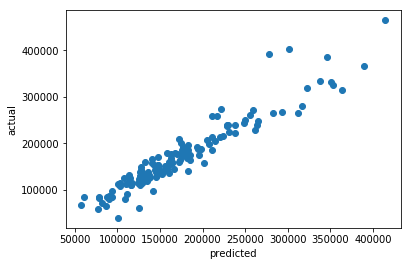

In [ ]:
gb_pred = fitted_models['gb'].predict(X_test_selected)
plt.scatter(gb_pred, y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [ ]:
type(fitted_models['gb'])

sklearn.model_selection._search.GridSearchCV

In [ ]:
type(fitted_models['gb'].best_estimator_)

sklearn.pipeline.Pipeline

In [ ]:
fitted_models['gb'].best_estimator_

Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('gradientboostingregressor', GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.2, loss='ls', max_depth=4, max_features=N...tors=200, presort='auto', random_state=1,
             subsample=1.0, verbose=0, warm_start=False))])

In [ ]:
import pickle

In [ ]:
with open('gb.pkl', 'wb') as f:
    pickle.dump(fitted_models['gb'].best_estimator_, f)

In [ ]:
with open('rf.pkl', 'wb') as f:
    pickle.dump(fitted_models['rf'].best_estimator_, f)